In [ ]:
# 오피넷 유가정보 분석
# - 브랜드 별 유류비 분석 (어느 브랜드가 가장 저렴한 가격으로 공급하는지) 
# - 셀프/주유원 주유에 따른 분석 (셀프 주유소가 더 싼가?)
# - 지역별로 유류비 가격 분석 (어디가 싸고 비싼지)

In [ ]:
# 데이터를 불러오기(크롤링 진행)
# - 크롤링 진행
# - 하나의 데이터로 합치기

In [3]:
import pandas as pd
from glob import glob

locFiles = glob('C:/Users/kwoni/Desktop/pycode/data/oil/지역_위치별*.csv') # 파일이 있는 디렉토리
locFiles

'C:/Users/kwoni/Desktop/pycode/data/oil\\지역_위치별(주유소)_강남구.csv'

In [8]:
# csv 데이터를 일괄로 tmp_df로 넣어준 뒤에 pd.concat()을 이용하여 열 기준으로 행 추가
tmp_df = []

for file in locFiles:   
    tmp = pd.read_csv(file, encoding='cp949',header=2)# 위쪽의 불필요한 부분 제거
    tmp_df.append(tmp) #tmp에 저장된 데이터 파일을 tmp_df에 추가해라

df = pd.concat(tmp_df, ignore_index = True) 
# tmp_df에 추가한 거 합친뒤 인덱스 재설정
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      1344 non-null   object
 1   상호      1344 non-null   object
 2   주소      1344 non-null   object
 3   상표      1344 non-null   object
 4   전화번호    1344 non-null   object
 5   셀프여부    1344 non-null   object
 6   고급휘발유   1344 non-null   object
 7   휘발유     1344 non-null   object
 8   경유      1344 non-null   object
 9   실내등유    1344 non-null   object
dtypes: object(10)
memory usage: 105.1+ KB
None


In [9]:
display(df.head(3))
display(df.tail(3))

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1979,1915,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2165,1985,1925,-
2,서울특별시,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,02-564-0187,N,2144,1994,1989,-


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
1341,서울특별시,범아주유소,서울 중랑구 동일로 881 (묵동),S-OIL,02-974-8356,N,-,2019,1939,1500
1342,서울특별시,용마로주유소,서울 중랑구 용마산로 309 (면목동),SK에너지,02-439-3037,Y,-,2048,1958,1500
1343,서울특별시,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),SK에너지,02-436-3651,Y,-,2069,1999,1500


In [10]:
df.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [11]:
df_o = df[['지역', '상호', '주소', '휘발유', '셀프여부','상표']] # 쓸 데이터 가져오기
df_o.columns=['시도', '상호', '주소', '휘발유가격', '셀프','상표'] # 이름 변경하기
df_o.head(3)

# iloc로 갖고 오는 방법
#df_o = df.iloc[:,[0,1,2,6,5,3]]
#df_o.columns=['시도', '상호', '주소', '휘발유가격', '셀프','상표']

,시도,상호,주소,휘발유가격,셀프,상표
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크
2,서울특별시,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),1994,N,S-OIL


In [13]:
# 주소를 이용해 시군구 추가
df_o['시군구'] = [addr.split()[1] for addr in df_o['주소']]
df_o['시군구'].unique()

C:\Users\kwoni\AppData\Local\Temp\ipykernel_13140\2665189514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['시군구'] = [addr.split()[1] for addr in df_o['주소']]


array(['강남구', '강동구', '강북구', '강서구', '관악구', '광산구', '남구', '동구', '북구', '서구',
       '광진구', '구로구', '금천구', '기장군', '노원구', '대덕구', '유성구', '중구', '광역시',
       '도봉구', '동대문구', '동작구', '마포구', '금정구', '동래구', '사상구', '사하구', '수영구',
       '연제구', '영도구', '부산진구', '해운대구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중랑구'], dtype=object)

In [22]:
#시군구 값이 '광역시'인 데이터 확인하기
#df_o[df_o['시군구'] == '광역시']

# 시군구 값이 '광역시'인 데이터를 중구로 바꾸는 작업
df_o.loc[df_o['시군구'] == '광역시','시군구'] = '중구'
df_o['시군구'].unique()

C:\Users\kwoni\AppData\Local\Temp\ipykernel_13140\3585167140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o.loc[df_o['시군구'] == '광역시','시군구'] = '중구'


array(['강남구', '강동구', '강북구', '강서구', '관악구', '광산구', '남구', '동구', '북구', '서구',
       '광진구', '구로구', '금천구', '기장군', '노원구', '대덕구', '유성구', '중구', '도봉구',
       '동대문구', '동작구', '마포구', '금정구', '동래구', '사상구', '사하구', '수영구', '연제구',
       '영도구', '부산진구', '해운대구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중랑구'], dtype=object)

In [26]:
#df_o[df_o['휘발유가격']=='-'] 가격을 공개하지 않은 데이터 확인
# 가격이 '-'으로 입력된 데이터 제거
df_o=df_o[df_o['휘발유가격']!='-'] # 휘발유 가격이 '-'가 아닌 것을 뽑아오는 방법
display(df_o[df_o['휘발유가격']=='-']) # 제거 여부 확인

,시도,상호,주소,휘발유가격,셀프,상표,시군구


In [32]:
# 데이터 타입 확인 
# df_o.dtypes

# 휘발유가격 필드의 데이터 타입을 숫자형으로 변경 (for문으로 변경)
df_o['휘발유가격'] = [int(val) for val  in df_o['휘발유가격']]

# 함수를 사용하는 방법
#df_o=df_o['휘발유가격'].astype({'가격': float})
print(df_o.dtypes)

df_o.isna().sum() # NaN 값 여부 확인

시도       object
상호       object
주소       object
휘발유가격     int64
셀프       object
상표       object
시군구      object
dtype: object


C:\Users\kwoni\AppData\Local\Temp\ipykernel_13140\2906200350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['휘발유가격'] = [int(val) for val  in df_o['휘발유가격']]


시도       0
상호       0
주소       0
휘발유가격    0
셀프       0
상표       0
시군구      0
dtype: int64

In [36]:
# 2. 데이터 분석하기
# - 셀프 주유소가 일반 주유소보다 저렴한지 확인
# boxplot으로 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
elif platform.system() == 'Windows':
    fontname = font_manager.FontProperties(fname='C:/Windows/Fonts/batang.ttc').get_name()
    rc('font',family = fontname)
else:
    print('이거 뭐임?')

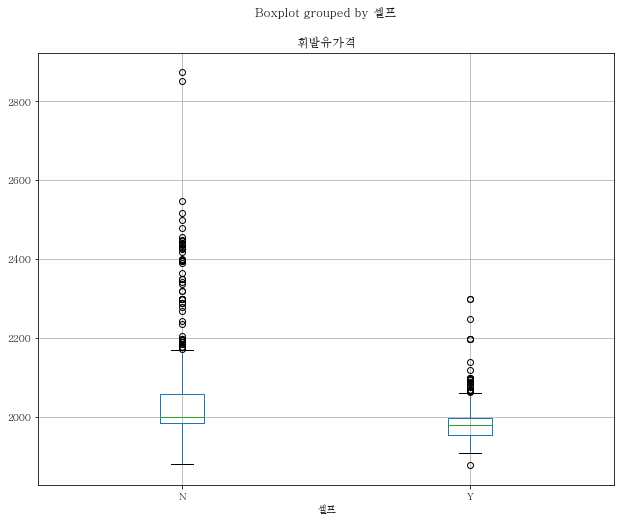

In [41]:
# 가격에 대한 셀프 여부에 따라 boxplot
df_o.boxplot(column='휘발유가격',by='셀프', figsize=(10,8))
plt.show()

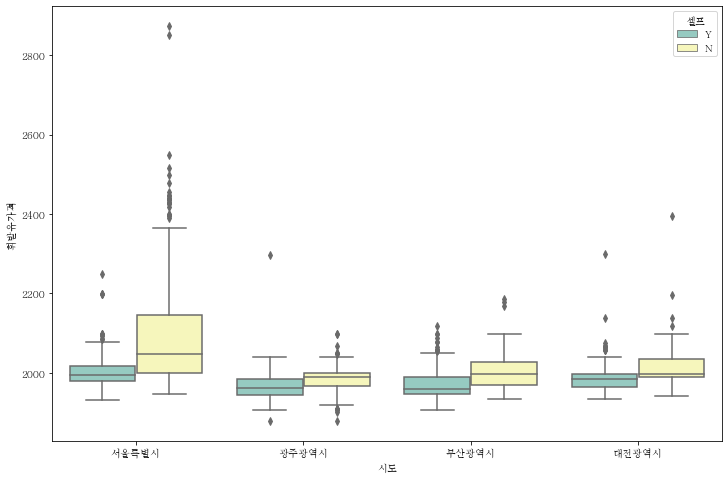

In [42]:
# 지역별(seaborn boxplot 사용)
plt.figure(figsize=(12,8))
sns.boxplot(x='시도',y='휘발유가격', hue='셀프', data=df_o, palette='Set3')
plt.show()

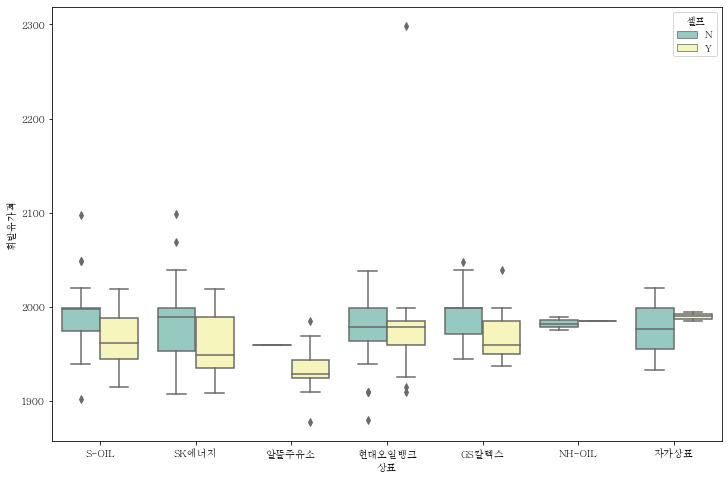

In [45]:
# 위 차트를 기준으로 광주광역시의 상표별 가격 출력
tmpDf=df_o[df_o['시도']=='광주광역시']
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='휘발유가격', hue='셀프', data=tmpDf, palette='Set3')
plt.show()

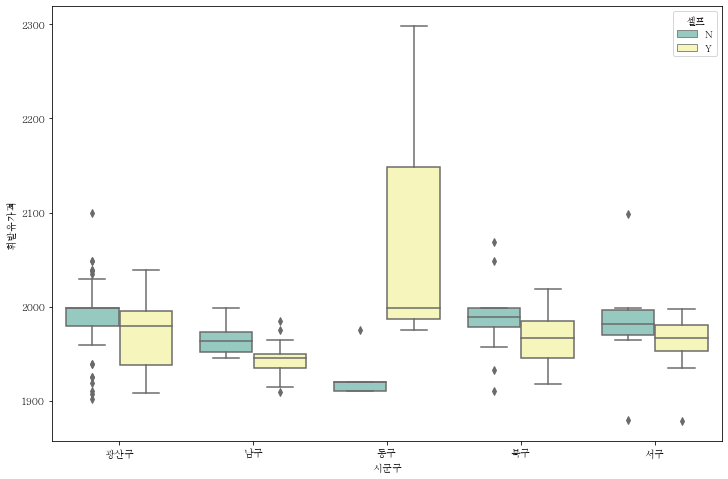

In [46]:
# 광주광역시 내 시군구에 따른 셀프, 일반 주유소의 휘발유 값 확인
tmpDf=df_o[df_o['시도']=='광주광역시']
plt.figure(figsize=(12,8))
sns.boxplot(x='시군구',y='휘발유가격', hue='셀프', data=tmpDf, palette='Set3')
plt.show()

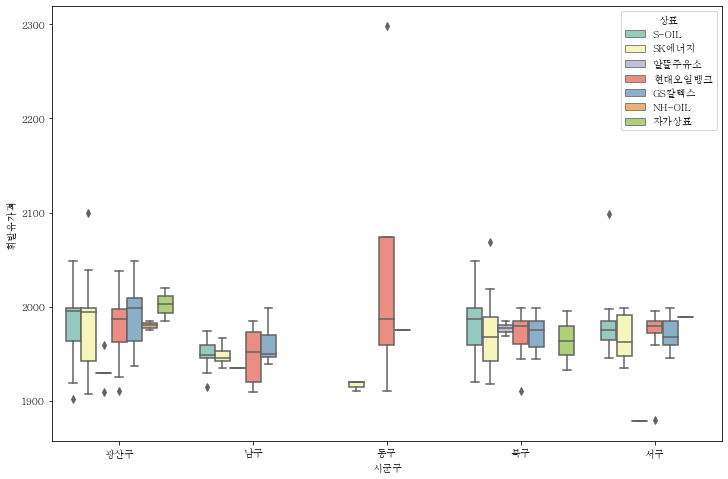

In [47]:
# 시군구에서 상표에 따른 가격
tmpDf=df_o[df_o['시도']=='광주광역시']
plt.figure(figsize=(12,8))
sns.boxplot(x='시군구',y='휘발유가격', hue='상표', data=tmpDf, palette='Set3')
plt.show()

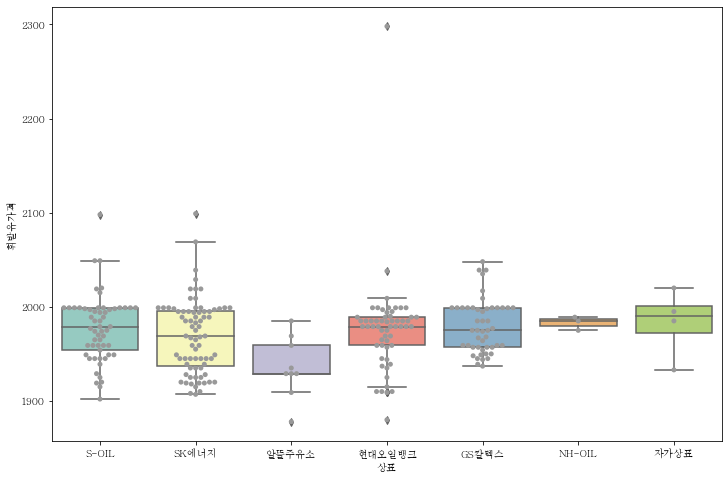

In [50]:
tmpDf=df_o[df_o['시도']=='광주광역시']
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='휘발유가격', data=tmpDf, palette='Set3')
sns.swarmplot(x='상표',y='휘발유가격', data=tmpDf, color='.6')
plt.show()

In [ ]:
# 서울시 구별 주유 가격 확인 (지도 이미지 활용해서 표시)
# - 서울의 구별 경계 위치를 이용한 지도 차트 그리기

In [51]:
import folium
import json
import numpy

In [52]:
df_tmp = df_o[df_o['시도']=='서울특별시']
df_tmp

,시도,상호,주소,휘발유가격,셀프,상표,시군구
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지,강남구
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크,강남구
2,서울특별시,에쓰-오일㈜직영 개나리주유소,서울 강남구 언주로 423 (역삼동),1994,N,S-OIL,강남구
3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1998,Y,SK에너지,강남구
4,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1998,Y,현대오일뱅크,강남구
...,...,...,...,...,...,...,...
1339,서울특별시,(주)기지에너지,서울 중랑구 용마산로 716 (신내동),2015,N,S-OIL,중랑구
1340,서울특별시,신내주유소,서울 중랑구 용마산로 705 (신내동),2018,Y,SK에너지,중랑구
1341,서울특별시,범아주유소,서울 중랑구 동일로 881 (묵동),2019,N,S-OIL,중랑구
1342,서울특별시,용마로주유소,서울 중랑구 용마산로 309 (면목동),2048,Y,SK에너지,중랑구


In [54]:
# 피벗 테이블 함수(pivot_table)를 이용하여 구별 평균값 계산
# 구별로 피벗테이블 만들기
gu_pdf = pd.pivot_table(df_tmp,index = ['시군구'],values='휘발유가격',aggfunc=numpy.mean) 

# 평균가격을 기준으로 내림차순 정렬
gu_pdf.sort_values('휘발유가격', ascending=False)

,휘발유가격
시군구,
용산구,2294.833333
중구,2292.333333
종로구,2248.500000
강남구,2151.242424
성동구,2097.235294
강동구,2087.928571
서초구,2080.424242
영등포구,2065.653846
구로구,2058.904762


In [58]:
# 서울특별시 지역 정보 가져오기 
geo_str = json.load(open('C:/Users/kwoni/Desktop/pycode/data/skorea_municipalities_geo_simple.json', 
                    encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [64]:
# 구글 맵 생성
# 행정구역 정보 다운로드 http://www.gisdeveloper.co.kr/?p=2332
# 통계청: https://sgis.kostat.go.kr/developer/html/main.html
map = folium.Map(location=[37.5502,126.982],zoom_start=10)

# folium 데이터 항목에 geo_data를 넣어주면 geo_data의 인덱스 값인 구 이름이
# folium의 내부 key로 인식하게 해서 해당 영역에 평균 휘발유값을 전달
map.choropleth(geo_data = geo_str, data = gu_pdf, # 지역 데이터 및 실제 지도에 표시할 데이터
               columns = [gu_pdf.index,'휘발유가격'], fill_color='PuRd' # 열 지정 및 색깔 지정
              ,key_on = 'id') # 지도에 키를 적용

map

In [65]:
# 부산 광역시 표현하기 - 개별
# 부산의 데이터 뽑아보기
df_bs = df_o[df_o['시도']=='부산광역시']
df_bs

,시도,상호,주소,휘발유가격,셀프,상표,시군구
421,부산광역시,공단신도시주유소,부산 기장군 정관면 정관로 835,1908,Y,현대오일뱅크,기장군
422,부산광역시,부경셀프주유소,부산 기장군 기장읍 반송로 1407,1915,Y,알뜰주유소,기장군
423,부산광역시,뉴장안IC주유소,부산 기장군 장안읍 좌동길 45,1925,Y,S-OIL,기장군
424,부산광역시,의학원self주유소,부산 기장군 장안읍 좌동길 47,1928,Y,SK에너지,기장군
425,부산광역시,선암주유소,부산 기장군 장안읍 기장대로 1453,1928,Y,알뜰주유소,기장군
...,...,...,...,...,...,...,...
1099,부산광역시,SK에너지(주)신도시주유소,부산 해운대구 대천로 82 (좌동),2009,Y,SK에너지,해운대구
1100,부산광역시,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,2009,N,SK에너지,해운대구
1101,부산광역시,송정파크주유소,부산 해운대구 해운대로 1088 (송정동),2058,N,GS칼텍스,해운대구
1102,부산광역시,광신석유(주)직영 해운대중동주유소,부산 해운대구 좌동로 18 (중동),2059,Y,SK에너지,해운대구


In [66]:
gu_pvdf = pd.pivot_table(df_bs,index = ['시군구'],values='휘발유가격',aggfunc=numpy.mean) 

# 평균가격을 기준으로 내림차순 정렬
gu_pvdf.sort_values('휘발유가격', ascending=False)

,휘발유가격
시군구,
영도구,2065.666667
중구,2017.000000
수영구,1995.500000
동구,1989.900000
사하구,1987.400000
사상구,1983.659091
금정구,1983.409091
강서구,1982.979592
남구,1981.466667


In [76]:
geo_str = json.load(open('C:/Users/kwoni/Desktop/pycode/data/skorea_municipalities_geo_simple_bs.json', 
                    encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '21310',
    'name': '기장군',
    'name_eng': 'Gijang-gun',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[129.2052495079534, 35.384810829415144],
      [129.21999816556436, 35.37561304214919],
      [129.26755198854022, 35.38341226661066],
      [129.2857909875702, 35.35965182306521],
      [129.2821380596251, 35.33844963971255],
      [129.30681468573164, 35.32644771030098],
      [129.2675569665142, 35.31604143854397],
      [129.26275266580004, 35.27831941566859],
      [129.24546065083584, 35.26120427164311],
      [129.25565431808167, 35.243593230216504],
      [129.23550974472084, 35.21139611410482],
      [129.22731336081907, 35.1832196018314],
      [129.2101963573097, 35.178863012450506],
      [129.20926574987496, 35.193858050365115],
      [129.1712609088194, 35.19779178977021],
      [129.15946955367855, 35.2060010318845],
      [129.17178499322435, 3

In [79]:
map = folium.Map(location=[35.18,129.07],zoom_start=11)

# folium 데이터 항목에 geo_data를 넣어주면 geo_data의 인덱스 값인 구 이름이
# folium의 내부 key로 인식하게 해서 해당 영역에 평균 휘발유값을 전달
map.choropleth(geo_data = geo_str, data = gu_pvdf, # 지역 데이터 및 실제 지도에 표시할 데이터
               columns = [gu_pvdf.index,'휘발유가격'], fill_color='PuRd' # 열 지정 및 색깔 지정
              ,key_on='feature.properties.name') # 지도에 키를 적용

map